**Import Library**

In [ ]:
 import pandas as pd
 import seaborn as sns
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.metrics import classification_report
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import roc_auc_score
 from sklearn.model_selection import GridSearchCV

*** Load the Dataset into a frame***

In [ ]:
 df = pd.read_csv('/content/heart.csv')

***  Print the description, dimensions and rst ve records of the frame.***

In [ ]:
 print(df.info())
 print(df.shape)
 print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
(303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0      

*** Check whether the data has any missing value in any column.***

In [ ]:
 df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Check whether the data has balanced class distribution. Class target = 0 indicates "Heart Disease" and target = 1 indicates "No Heart
 Disease".
**bold text**

<Axes: ylabel='count'>

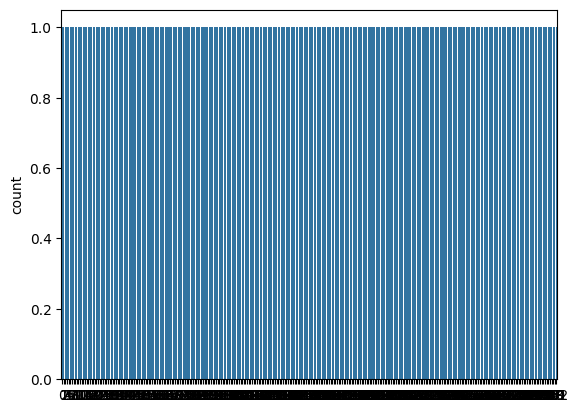

In [ ]:
 sns.countplot(df['target'])

 **Create input features X, target Y, classi er object, train-test-split using 80-20% split**

In [ ]:
 #x = df.drop(columns=['target'])
 x=df.iloc[:,:-1].values;
 #y = df['target']
 y=df.iloc[:,-1]

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=4)

*** Train model***

In [ ]:
 #Training the model
 knn = KNeighborsClassifier()
 knn.fit(x_train, y_train)
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
 weights='uniform')

KNeighborsClassifier()

**Validate model on test set**

In [ ]:
 y_pred = knn.predict(x_test)

*** Print Classi cation Report on test data***

In [ ]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        25
           1       0.65      0.61      0.63        36

    accuracy                           0.57        61
   macro avg       0.56      0.57      0.56        61
weighted avg       0.58      0.57      0.58        61



**Print AUC score on test data**

In [ ]:
 roc_auc_score(y_test, y_pred)

0.5655555555555556

 The performance of the model is vey poor. Hence hyperparameters of kNN to be tuned using GridSearchCV.

Hyperparameter tuning using GridSearchCV. Set the parameters a)leaf-size= 1 to 15, b)n_neighbors = 1 to 10 and c) distance metric, p = 1,
 2. When p =1 its Manhattan and p = 2 its Euclidean distance. GridSearchCV uses CV to search for the optimal values of the
 hyperparameters. It accepts the hyperparameters as a dictionary. ***bold text***

In [ ]:
 leaf_size = list(range(1,15))
 n_neighbors = list(range(1,10))
 p=[1,2]
 hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

**Train a new kNN model using GridSearchCV.**

In [ ]:
 knn_2 = KNeighborsClassifier()
 clf = GridSearchCV(knn_2, hyperparameters, cv=10, scoring = 'roc_auc')
 best_model = clf.fit(x,y)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


*** Print the best values of the hyperparameters***

In [ ]:
 #Nilai hyperpaameters terbaik
 print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
 print('Best p:', best_model.best_estimator_.get_params()['p'])
 print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
 print('Best Score:', best_model.best_score_)

Best leaf_size: 9
Best p: 1
Best n_neighbors: 7
Best Score: 0.7483536683904332


**Validate the model on test data**

In [ ]:
 y_pred = best_model.predict(x_test)

*** Print classi cation report and AUC score of the model on test data***

In [ ]:
 print(classification_report(y_test, y_pred))
 print("AUC SCORE is",roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.81      0.81      0.81        36

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61

AUC SCORE is 0.7627777777777778
